In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from model_house import calc_area
from calc_designed_indices import calc_designed_indices
from calc_standard_indices import calc_standard_indices_wrapper

# グラフ描画に用いる関数

In [2]:
def draw_hist_graphs(region, v):
    
    fig = plt.figure(figsize=(14,16))

    for r in range(8):
        ax = fig.add_subplot(4,2,r+1)
        ax.hist(v[region==r+1], bins=100)
        ax.set_title('region ' +  str(r+1) + '   n = ' + str(len(v[region==r+1])) )
    
    plt.show()

In [3]:
def draw_hist_graphs_double(region, v1, v2, label1, label2):
    
    fig = plt.figure(figsize=(14,16))

    for r in range(8):
        ax = fig.add_subplot(4,2,r+1)
        ax.hist(v1[region==r+1], bins=100, alpha=0.3, color='b', label=label1)
        ax.hist(v2[region==r+1], bins=100, alpha=0.3, color='r', label=label2)
        ax.set_title('region ' +  str(r+1) + '   n = ' + str(len(v1[region==r+1])) )
    
    plt.show()

In [4]:
def draw_bar_graphs(region, v, label):
    
    fig = plt.figure(figsize=(14,16))
    
    for r in range(8):
        ax = fig.add_subplot(4,2,r+1)
        ax.bar(range(len(label)), [np.count_nonzero(v[region==r+1] == s) for s in label], tick_label=label)
        ax.set_title('region ' +  str(r+1) + '   n = ' + str(len(v[region==r+1])) )

    plt.show()

In [5]:
def draw_scatter_graphs(region, v1, v2):
    
    fig = plt.figure(figsize=(14,20))
    
    for r in range(8):
        ax = fig.add_subplot(4,2,r+1)
        ax.scatter(v1[region==r+1], v2[region==r+1])
        ax.plot([0,np.max(v1[region==r+1])], [0,np.max(v2[region==r+1])], 'r')
        ax.set_xlabel('detail')
        ax.set_ylabel('simple')
        ax.set_title('region ' +  str(r+1) + '   n = ' + str(len(v1[region==r+1])) )

    
    plt.show()

# ファイルの読み込み

In [6]:
f_envelope = open('envelope_spec.json', 'r')
data_envelope = json.load(f_envelope)
data_envelope

{'group1': {'mean': [-1.7810286755122835,
   -1.1342760222904817,
   -1.2321375674943118,
   -1.3517255378280724,
   -1.2049389740769594,
   0.5025948019843093,
   0.3795247460606462,
   -0.9796472373725341,
   -1.2587855684047227],
  'cov': [[0.049601585910625474,
    0.03320751887720919,
    0.02212271333200601,
    0.041944781614676435,
    0.05148143013402873,
    0.025226456088206,
    0.022857211085514,
    0.018438184392848736,
    0.007373056500913688],
   [0.03320751887720919,
    0.061759648191812504,
    0.02822638467438709,
    0.04679534597361074,
    0.06395104008122443,
    0.029244553531047195,
    0.026401009579770054,
    0.020777095227589058,
    0.003046828228264973],
   [0.02212271333200601,
    0.028226384674387095,
    0.04516462620124811,
    0.045159360666270895,
    0.05552759328068185,
    0.03195925571739742,
    0.028445121930553426,
    0.028865500756349163,
    0.010809678006721146],
   [0.041944781614676435,
    0.04679534597361075,
    0.045159360666270

In [7]:
f_house = open('house_spec.json', 'r')
data_house = json.load(f_house)
data_house

{'story': {'a': [1, 2, 3],
  'p': {'region_1': [0.09032258064516129,
    0.8903225806451613,
    0.01935483870967742],
   'region_2': [0.09032258064516129, 0.8903225806451613, 0.01935483870967742],
   'region_3': [0.13934426229508196, 0.860655737704918, 0.0],
   'region_4': [0.08139534883720931, 0.8976744186046511, 0.020930232558139535],
   'region_5': [0.06236220472440945, 0.8922834645669291, 0.04535433070866142],
   'region_6': [0.06236220472440945, 0.8922834645669291, 0.04535433070866142],
   'region_7': [0.5111111111111111, 0.4777777777777778, 0.011111111111111112],
   'region_8': [0.4782608695652174,
    0.4782608695652174,
    0.043478260869565216]}},
 'floor_area': {'log_ave': 4.795434569066554, 'log_std': 0.27356281805671834},
 'aspect_ratio': {'log_ave': 0.34265303318546936,
  'log_std': 0.24512178873989865},
 'direction': {'a': ['n', 'ne', 'e', 'se', 's', 'sw', 'w', 'nw'],
  'p': [0.005940594059405941,
   0.015841584158415842,
   0.0297029702970297,
   0.16435643564356436,
  

# 乱数の発生

## 発生する住戸の数

地域別に発生する個数を決定する。

In [8]:
n=[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]

## 地域の区分

In [9]:
region = np.concatenate([np.repeat([r+1], n[r]) for r in range(8)])

## 外皮性能（地域別）

In [10]:
envelope = np.concatenate([
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group1']['mean'], cov=data_envelope['group1']['cov'], size=n[0])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group1']['mean'], cov=data_envelope['group1']['cov'], size=n[1])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group2']['mean'], cov=data_envelope['group2']['cov'], size=n[2])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group2']['mean'], cov=data_envelope['group2']['cov'], size=n[3])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group3']['mean'], cov=data_envelope['group3']['cov'], size=n[4])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group3']['mean'], cov=data_envelope['group3']['cov'], size=n[5])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group3']['mean'], cov=data_envelope['group3']['cov'], size=n[6])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group4']['mean'], cov=data_envelope['group4']['cov'], size=n[7])).T
], axis=1)

In [11]:
upper_u = envelope[0,:]
wall_u = envelope[1,:]
lower_u = envelope[2,:]
base_psi_outside = envelope[3,:]
base_psi_inside = envelope[4,:]
window_u = envelope[5,:]
window_attachment_u = envelope[6,:]
window_eta = envelope[7,:]
window_attachment_eta = envelope[8,:]

### 上部のU値

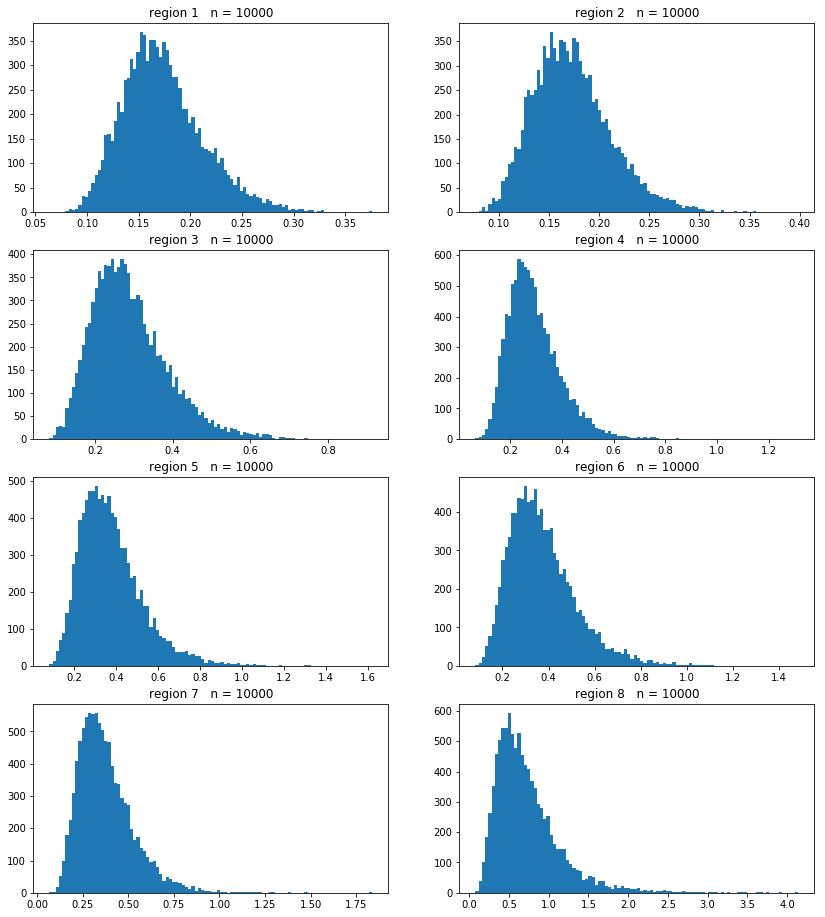

In [12]:
draw_hist_graphs(region, upper_u)

### 外壁のU値

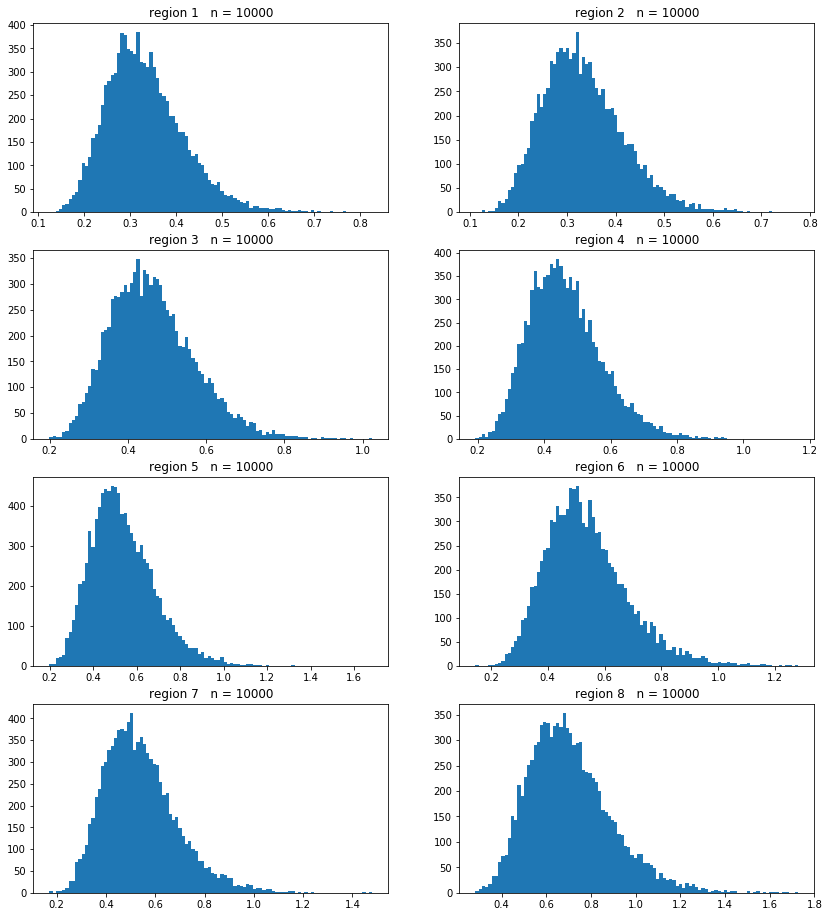

In [13]:
draw_hist_graphs(region, wall_u)

### 下部のU値

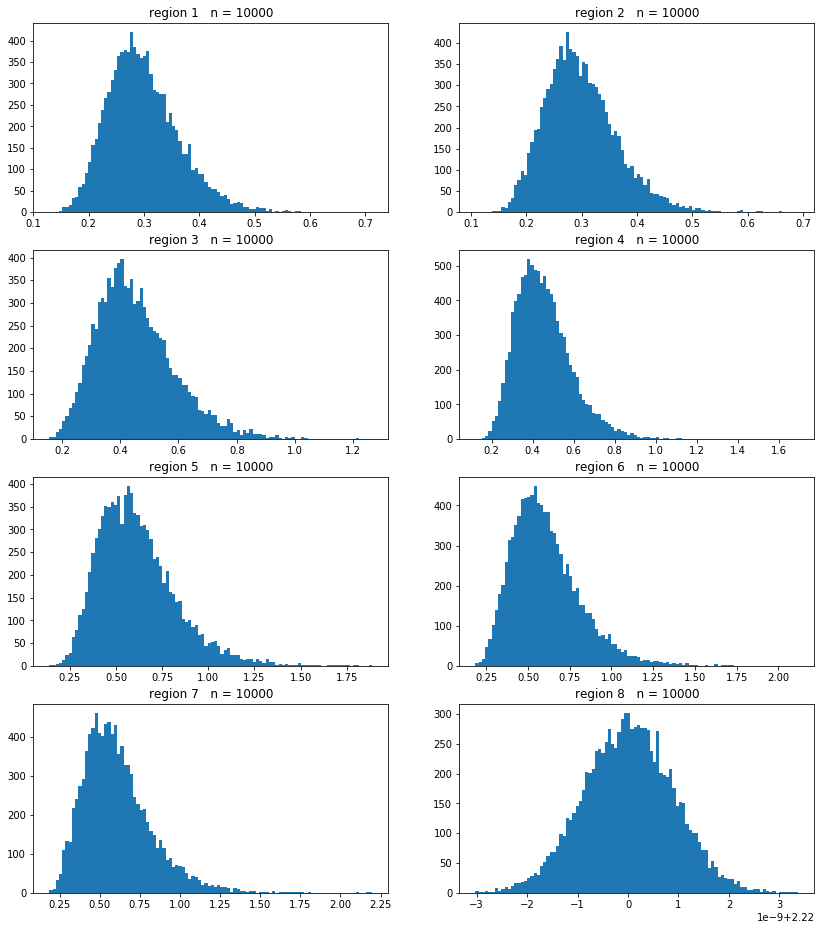

In [14]:
draw_hist_graphs(region, lower_u)

### 土間床外壁側のψ値

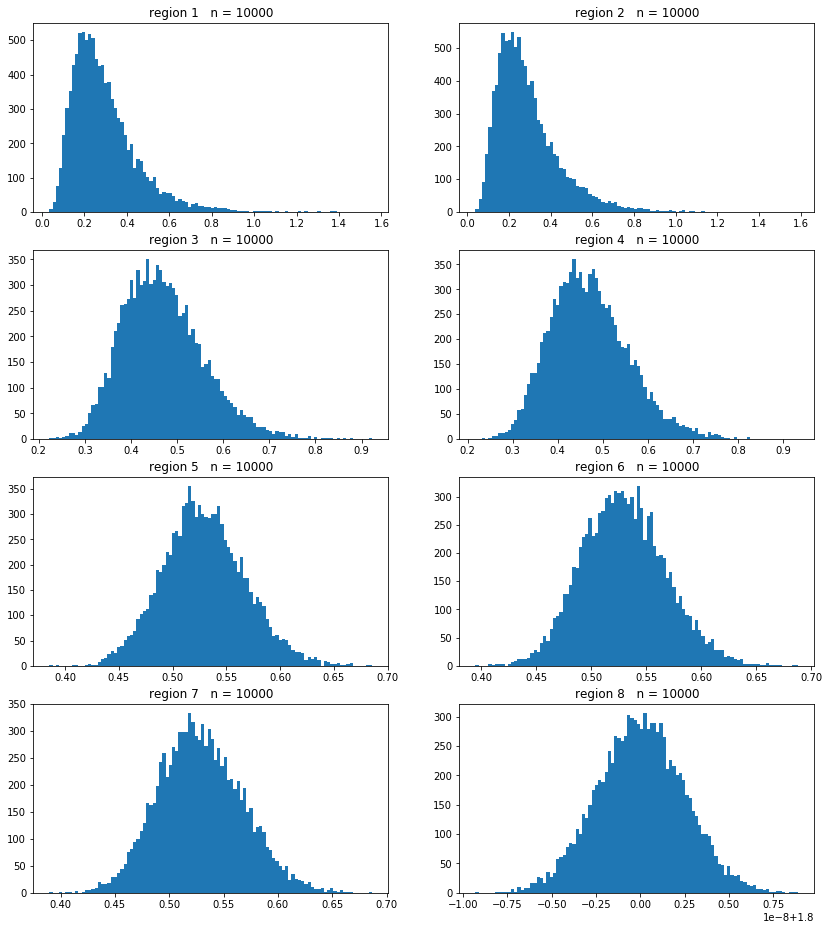

In [15]:
draw_hist_graphs(region, base_psi_outside)

### 土間床床下側のψ値

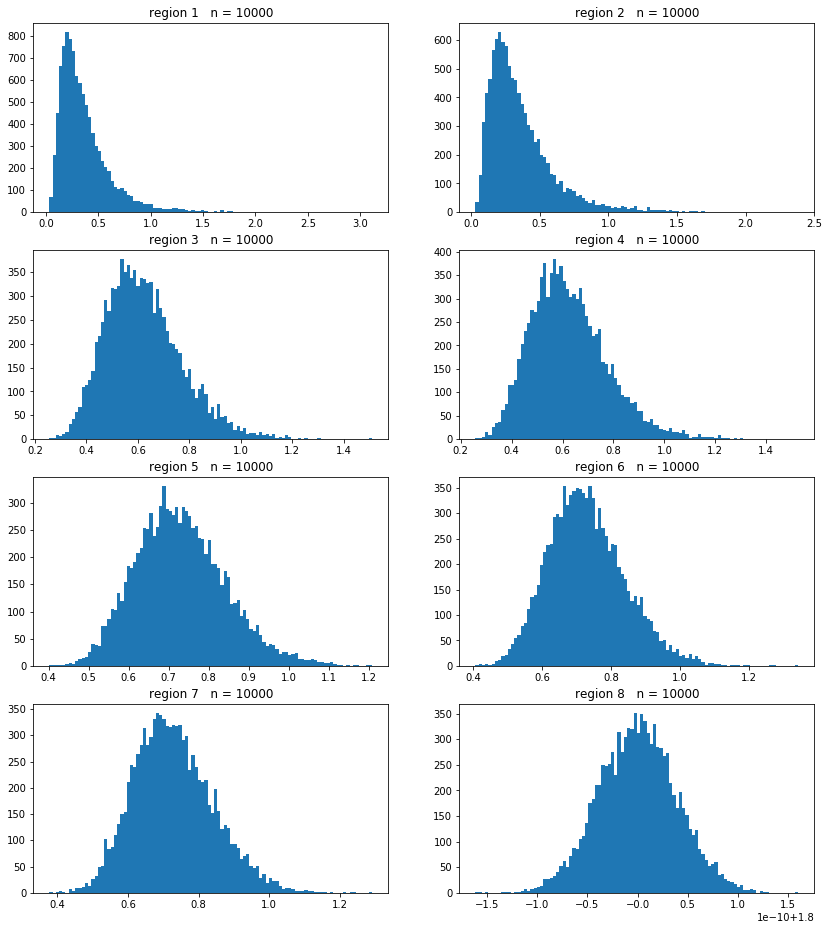

In [16]:
draw_hist_graphs(region, base_psi_inside)

### 窓のU値

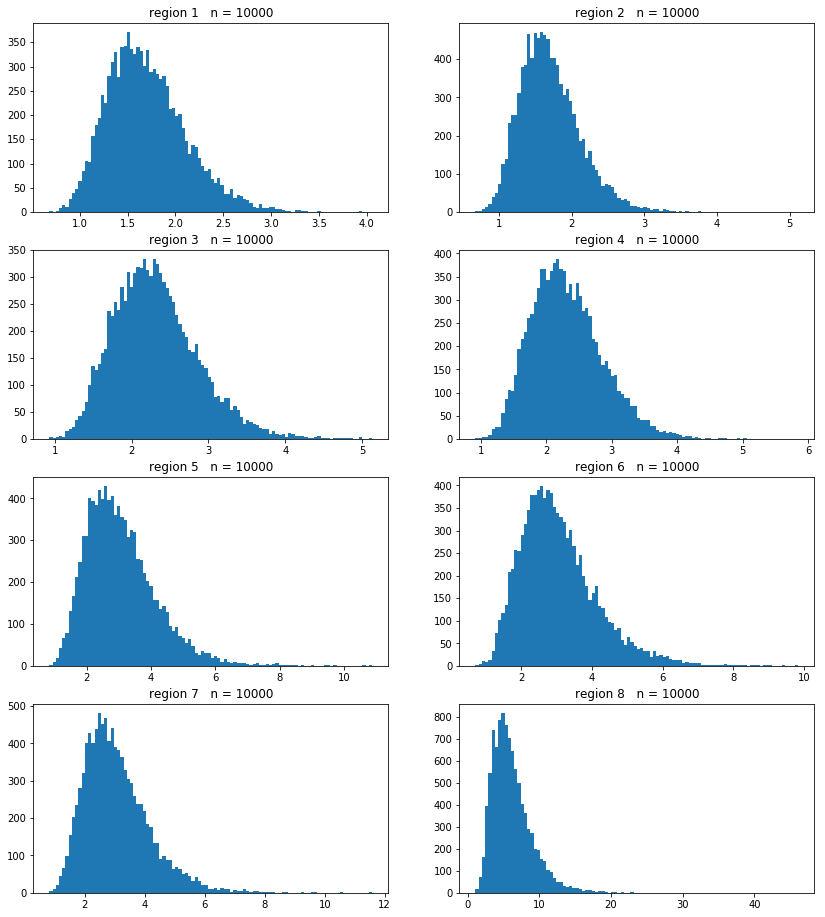

In [17]:
draw_hist_graphs(region, window_u)

### 窓（障子）のU値

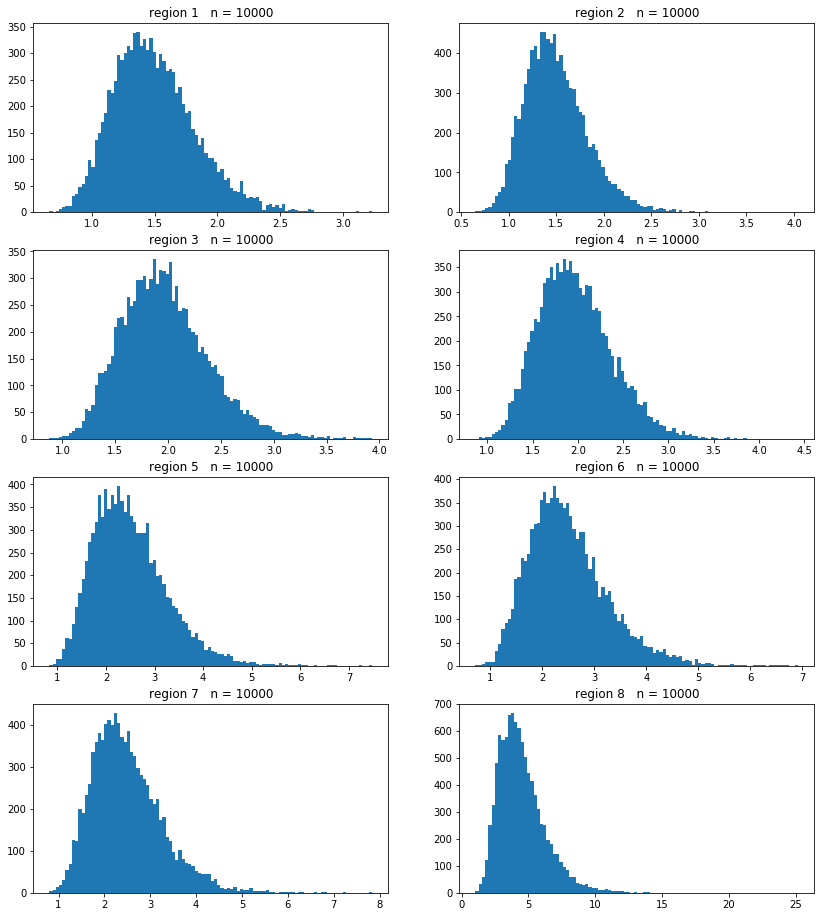

In [18]:
draw_hist_graphs(region, window_attachment_u)

### 窓のη値

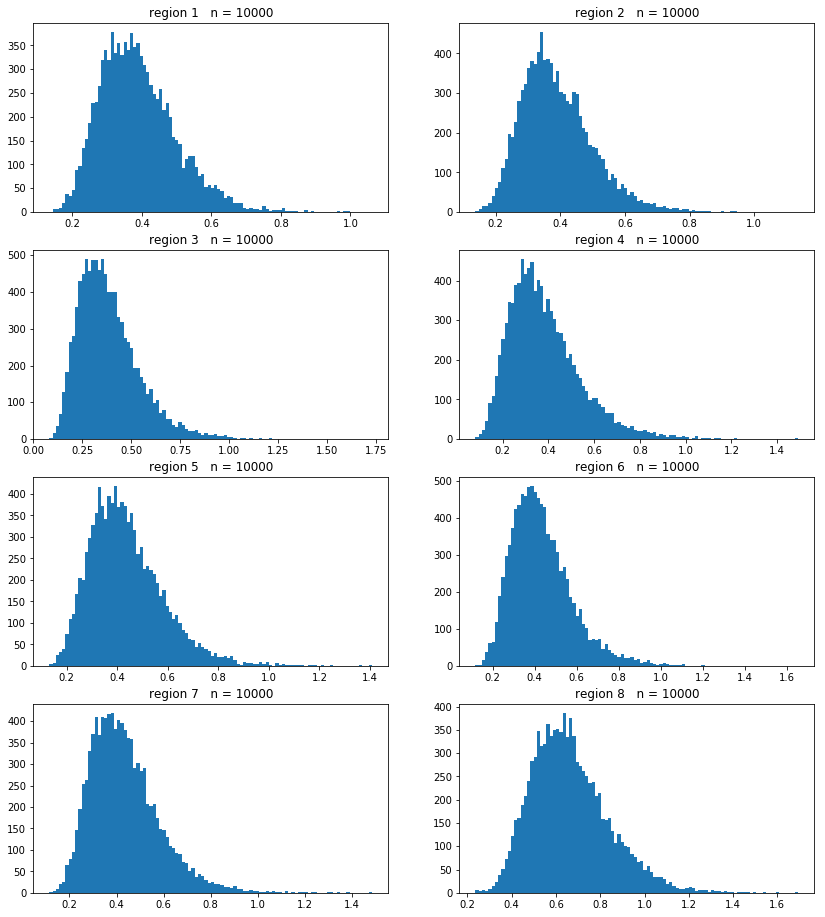

In [19]:
draw_hist_graphs(region, window_eta)

### 窓（障子）のη値

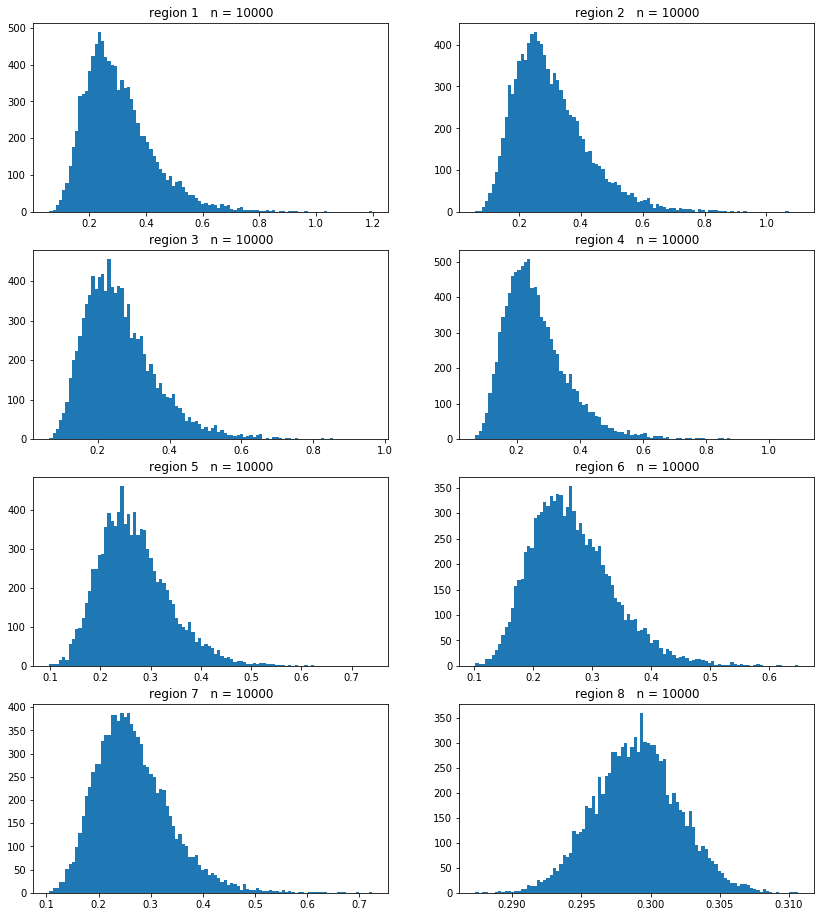

In [20]:
draw_hist_graphs(region, window_attachment_eta)

## 階数（地域別）

In [21]:
story = np.concatenate([
    np.random.choice(a=data_house['story']['a'], size=n[0], p=data_house['story']['p']['region_1']),
    np.random.choice(a=data_house['story']['a'], size=n[1], p=data_house['story']['p']['region_2']),
    np.random.choice(a=data_house['story']['a'], size=n[2], p=data_house['story']['p']['region_3']),
    np.random.choice(a=data_house['story']['a'], size=n[3], p=data_house['story']['p']['region_4']),
    np.random.choice(a=data_house['story']['a'], size=n[4], p=data_house['story']['p']['region_5']),
    np.random.choice(a=data_house['story']['a'], size=n[5], p=data_house['story']['p']['region_6']),
    np.random.choice(a=data_house['story']['a'], size=n[6], p=data_house['story']['p']['region_7']),
    np.random.choice(a=data_house['story']['a'], size=n[7], p=data_house['story']['p']['region_8']),
])

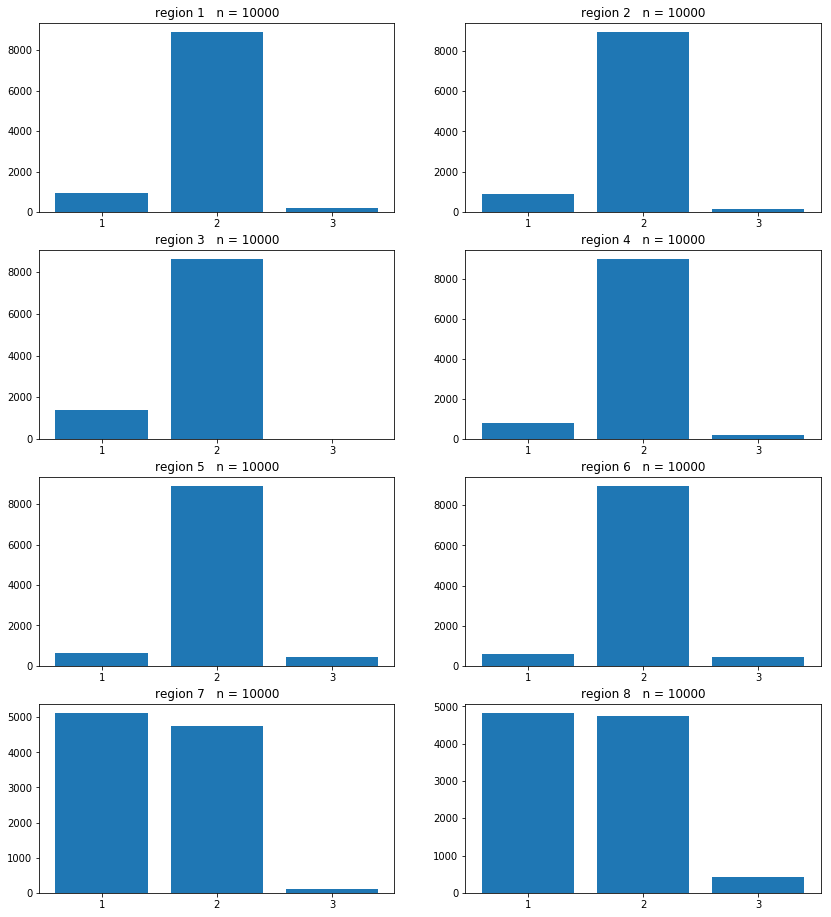

In [22]:
draw_bar_graphs(region, story, data_house['story']['a'])

## 床面積

In [23]:
floor_area = np.exp(np.random.normal(
    loc=data_house['floor_area']['log_ave'], scale=data_house['floor_area']['log_std'], size=sum(n)))

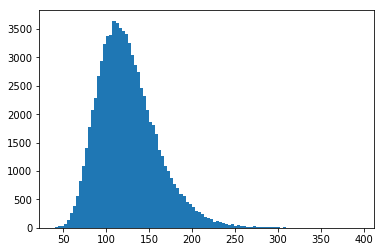

In [24]:
plt.hist(floor_area, bins=100)
plt.show()

## アスペクト比

In [25]:
aspect_ratio = np.exp(np.random.normal(
    loc=data_house['aspect_ratio']['log_ave'], scale=data_house['aspect_ratio']['log_std'], size=sum(n)))

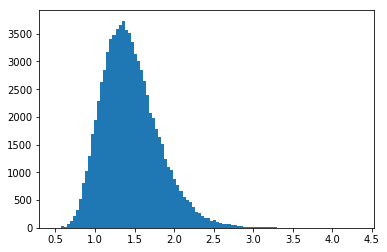

In [26]:
plt.hist(aspect_ratio, bins=100)
plt.show()

## 主たる方位

In [27]:
direction = np.random.choice(
    a=data_house['direction']['a'], size=sum(n), p=data_house['direction']['p'])

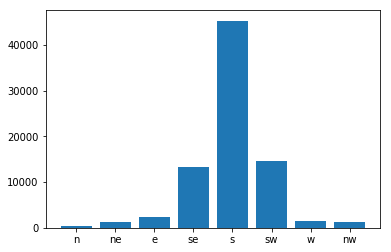

In [28]:
plt.bar(
    x=range(8),
    height=[np.count_nonzero(direction == d) for d in data_house['direction']['a']],
    tick_label=data_house['direction']['a'])
plt.show()

## 開口部比率

In [29]:
opening_ratio = np.exp(np.random.normal(
    loc=data_house['opening_ratio']['log_ave'], scale=data_house['opening_ratio']['log_std'], size=sum(n)))

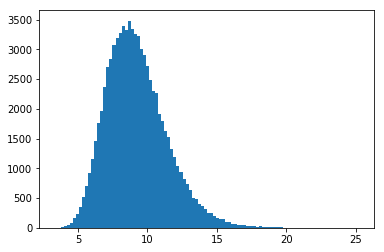

In [30]:
plt.hist(opening_ratio, bins=100)
plt.show()

# 住宅の作成

## 当該住宅

In [31]:
house = np.vectorize(calc_area)(
    house_type='detached',
    a_f_total=floor_area,
    r_open=opening_ratio*0.01,
    floor_ins_type='floor',
    bath_ins_type='base')

## 面積固定住宅（開口率14%）

In [32]:
house_s_14 = np.vectorize(calc_area)(
    house_type='detached',
    a_f_total=90.0,
    r_open=0.14,
    floor_ins_type='floor',
    bath_ins_type='base')

## 面積固定住宅（開口率12%）

In [33]:
house_s_12 = np.vectorize(calc_area)(
    house_type='detached',
    a_f_total=90.0,
    r_open=0.12,
    floor_ins_type='floor',
    bath_ins_type='base')

## 面積固定住宅（開口率10%）

In [34]:
house_s_10 = np.vectorize(calc_area)(
    house_type='detached',
    a_f_total=90.0,
    r_open=0.10,
    floor_ins_type='floor',
    bath_ins_type='base')

## 面積固定住宅（開口率8%）

In [35]:
house_s_08 = np.vectorize(calc_area)(
    house_type='detached',
    a_f_total=90.0,
    r_open=0.08,
    floor_ins_type='floor',
    bath_ins_type='base')

# 指標の計算

In [36]:
u_a = np.vectorize(calc_designed_indices)(
    house,
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta)

In [37]:
u_a_s_14 = np.vectorize(calc_designed_indices)(
    house_s_14,
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta)

In [38]:
u_a_s_12 = np.vectorize(calc_designed_indices)(
    house_s_12,
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta)

In [39]:
u_a_s_10 = np.vectorize(calc_designed_indices)(
    house_s_10,
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta)

In [40]:
u_a_s_08 = np.vectorize(calc_designed_indices)(
    house_s_08,
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta)

In [41]:
r_14 = u_a_s_14 / u_a

In [42]:
r_12 = u_a_s_12 / u_a

In [43]:
r_10 = u_a_s_10 / u_a

In [44]:
r_08 = u_a_s_08 / u_a

# 比較

## 開口率14%の場合の散布図とヒストグラム

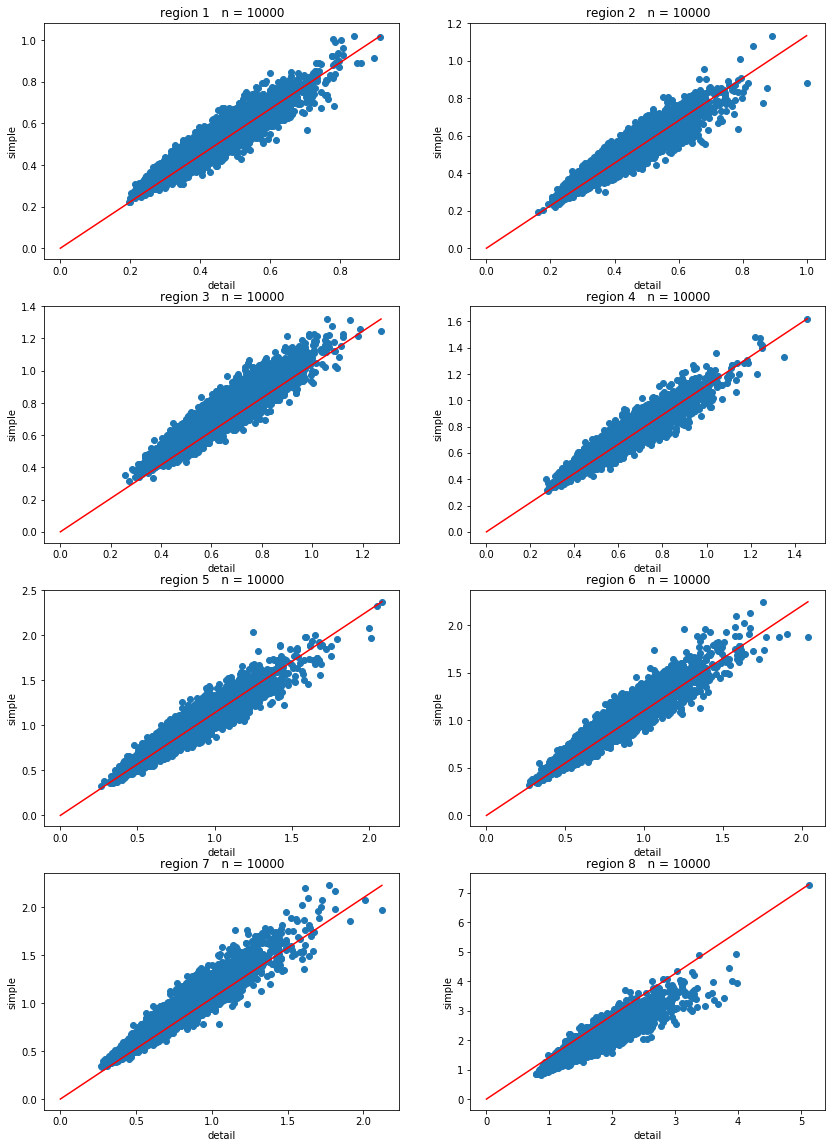

In [45]:
draw_scatter_graphs(region, u_a, u_a_s_14)

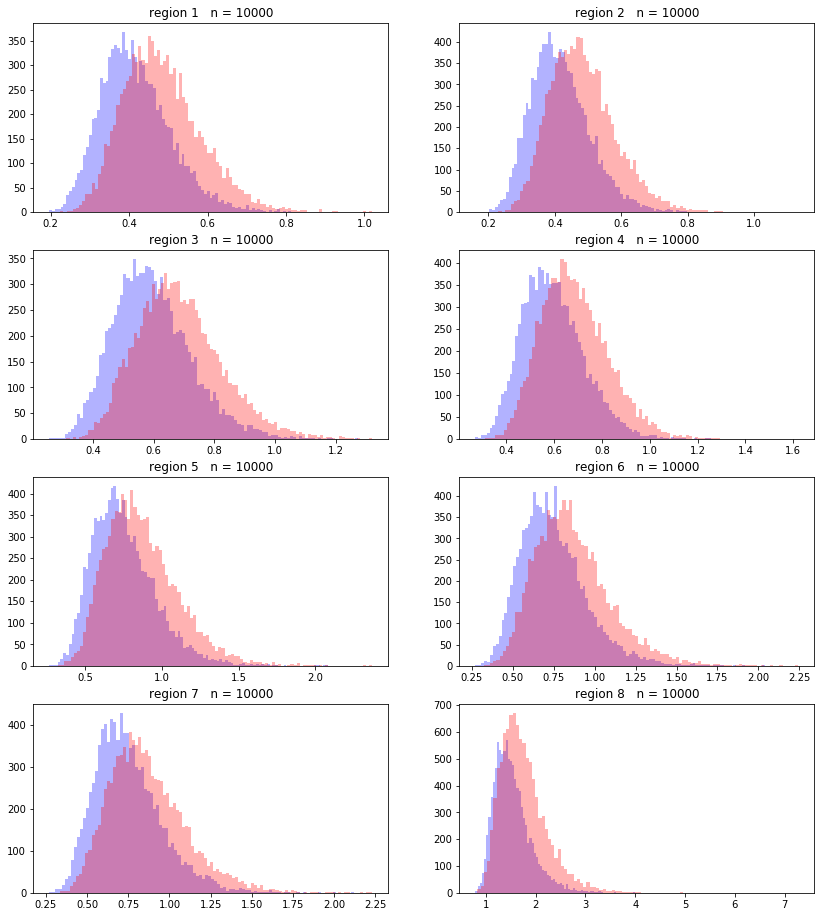

In [46]:
draw_hist_graphs_double(region, u_a, u_a_s_14, 'detail', 'simple')

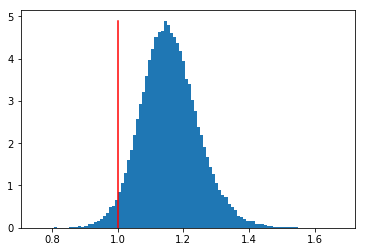

In [47]:
d=plt.hist(r_14, bins=100, density=True)
plt.plot([1.0, 1.0], [0.0, np.max(d[0])], color='r')
plt.show()

余裕率（簡易法の方が性能が良くでてしまう割合）

In [48]:
np.count_nonzero(r_14 < 1.0) / np.count_nonzero(r_14)

0.0282875

## 開口率12%の場合の散布図とヒストグラム

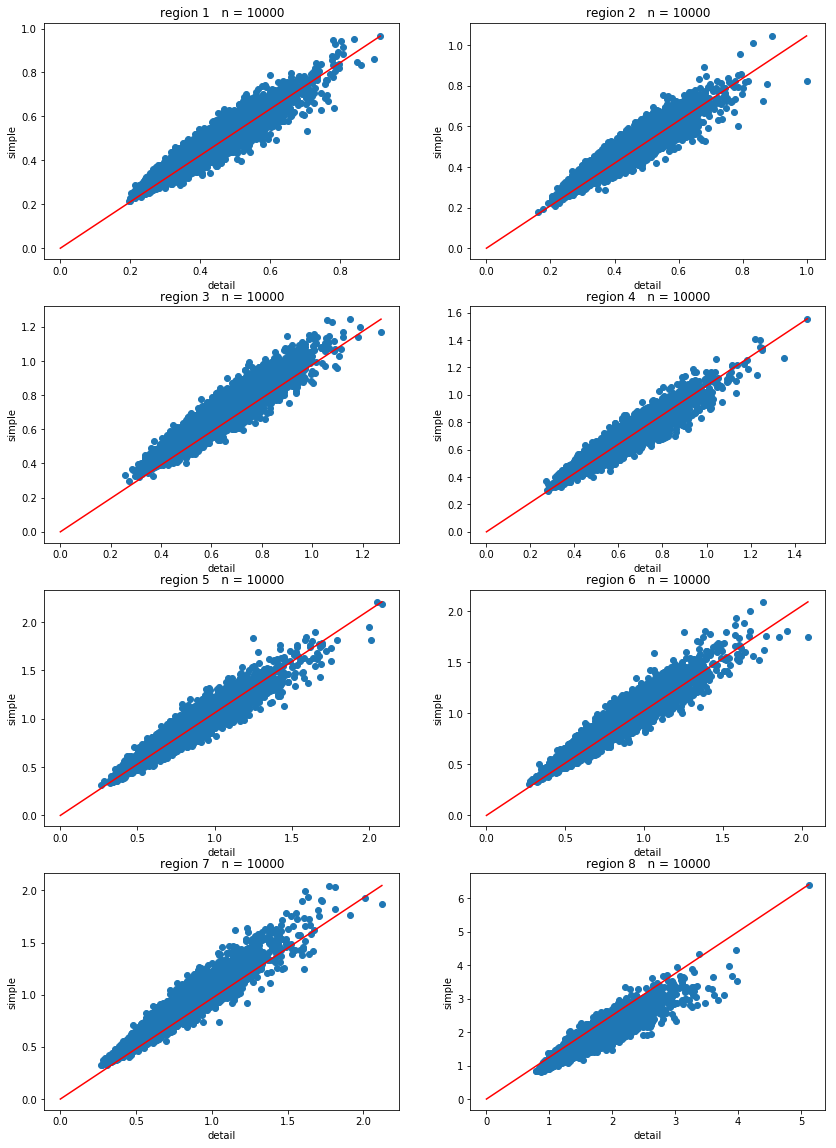

In [49]:
draw_scatter_graphs(region, u_a, u_a_s_12)

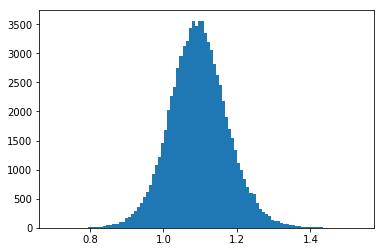

In [50]:
plt.hist(r_12, bins=100)
plt.show()

余裕率（簡易法の方が性能が良くでてしまう割合）

In [51]:
np.count_nonzero(r_12 < 1.0) / np.count_nonzero(r_12)

0.1045125

## 開口率10%の場合の散布図とヒストグラム

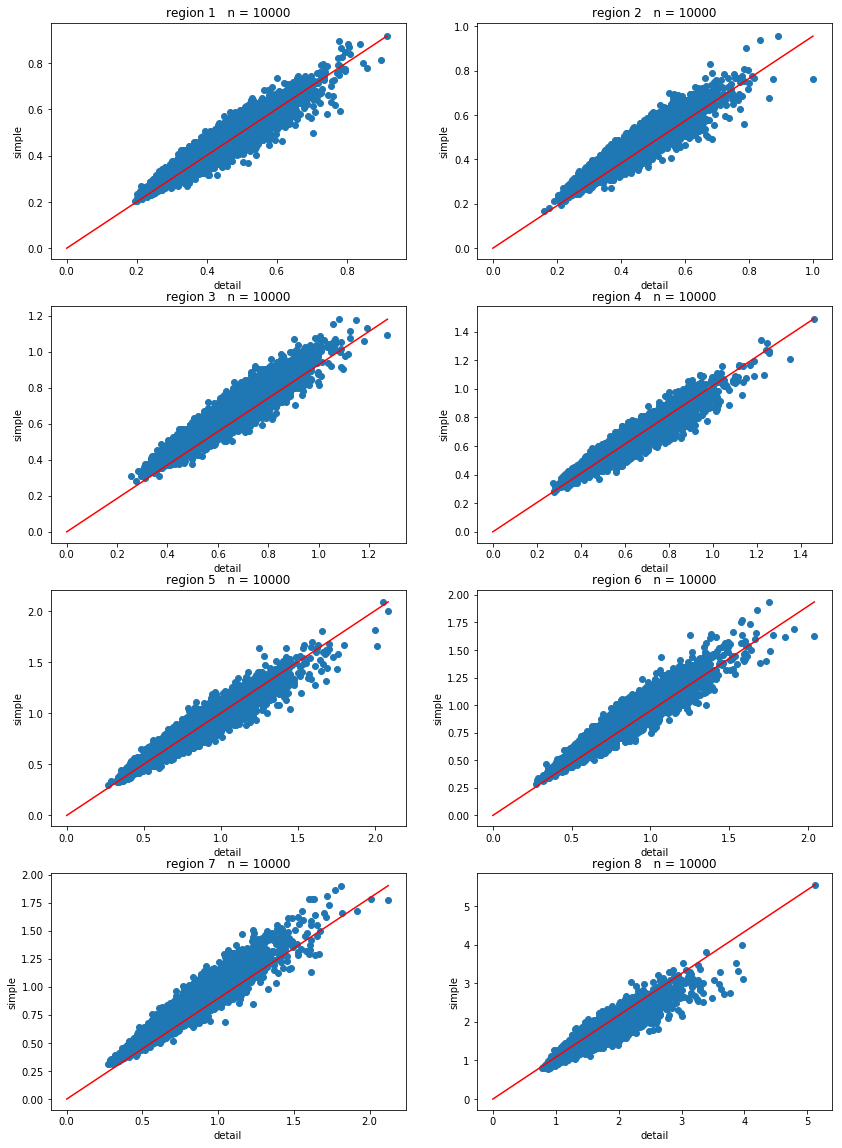

In [52]:
draw_scatter_graphs(region, u_a, u_a_s_10)

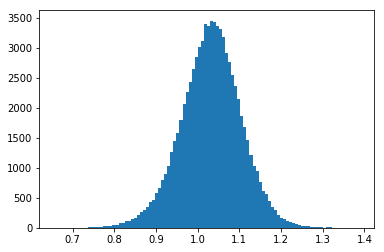

In [53]:
plt.hist(r_10, bins=100)
plt.show()

余裕率（簡易法の方が性能が良くでてしまう割合）

In [54]:
np.count_nonzero(r_10 < 1.0) / np.count_nonzero(r_10)

0.315

## 開口率8%の場合の散布図とヒストグラム

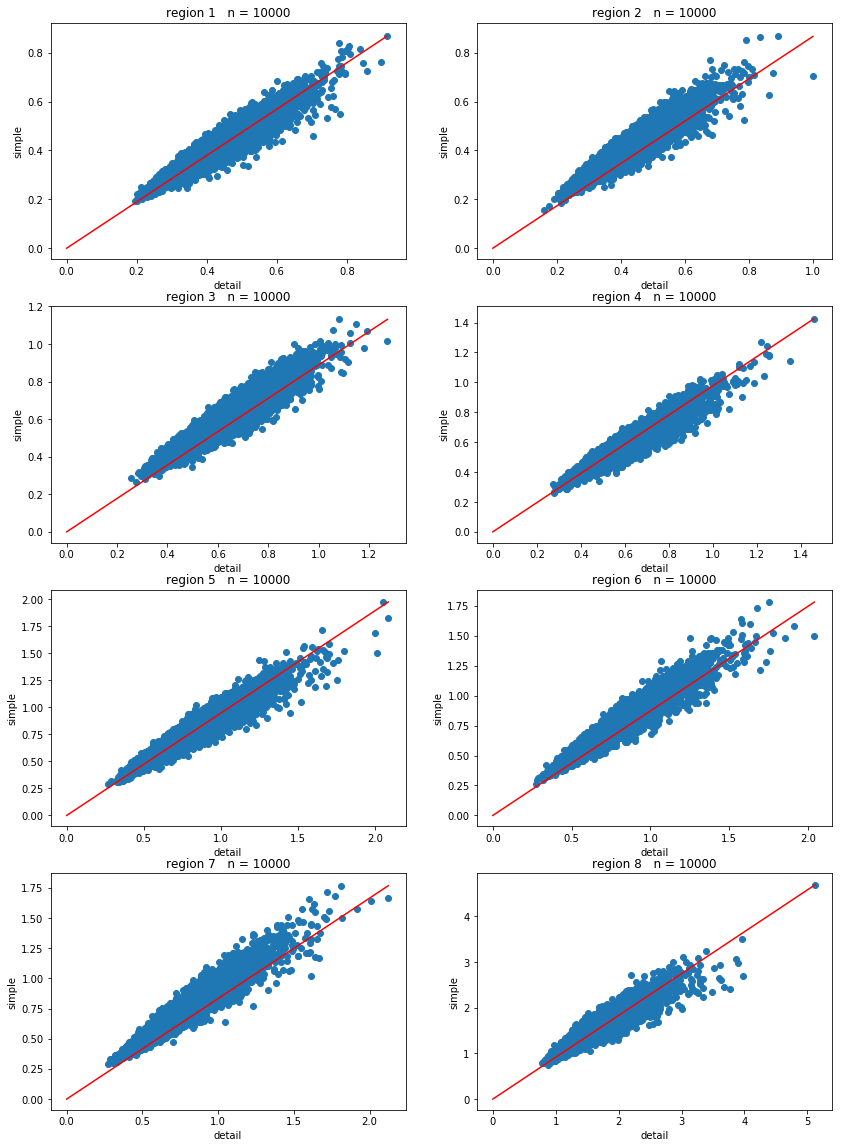

In [55]:
draw_scatter_graphs(region, u_a, u_a_s_08)

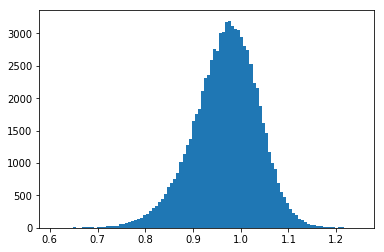

In [56]:
plt.hist(r_08, bins=100)
plt.show()

余裕率（簡易法の方が性能が良くでてしまう割合）

In [57]:
np.count_nonzero(r_08 < 1.0) / np.count_nonzero(r_08)

0.6693

# 床面積に対する開口部面積

In [58]:
a_window = np.array([h['a_evp_window_total'] for h in house])

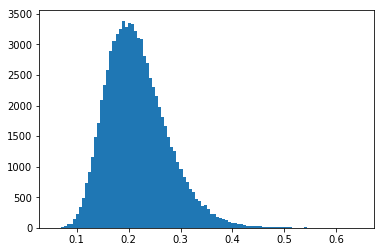

In [59]:
plt.hist(a_window/floor_area, bins=100)
plt.show()

In [60]:
u_a_limit = u_a[a_window/floor_area<0.3]
u_a_s_10_limit = u_a_s_10[a_window/floor_area<0.3]
r_10_limit = u_a_s_10_limit / u_a_limit

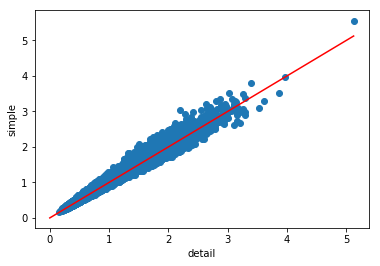

In [61]:
plt.scatter(u_a_limit, u_a_s_10_limit)
plt.plot([0,np.max(u_a)],[0,np.max(u_a)], 'r')
plt.xlabel('detail')
plt.ylabel('simple')
plt.show()

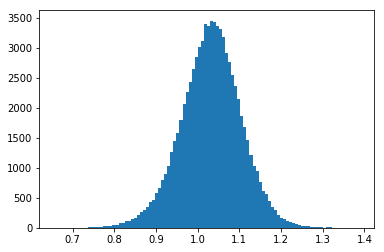

In [62]:
plt.hist(r_10, bins=100)
plt.show()

In [63]:
np.count_nonzero(r_10 < 1.0) / np.count_nonzero(r_10)

0.315

In [64]:
np.count_nonzero(r_10_limit < 1.0) / np.count_nonzero(r_10_limit)

0.24825429053544237